# Проект по основам машинного обучения

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

## Загрузка и предобработка данных

Перед началом анализа импортируем все необходимые для работы библиотеки и загрузим заданный датафрейм

In [1]:
# импортируем библиотеки для работы с данными, графиками и математическими операторами
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# прочитаем и присвоим название датафрейму двумя вариантами через связку try-except, 
try:
  df = pd.read_csv('C://Users//podor//jupyter notes//gym_churn.csv',)
except:
  df = pd.read_csv('/datasets/gym_churn.csv')

# уберем ограничение по количество отображаемых символом ячейки для удобства
pd.set_option('display.max_colwidth', 500)

Выведем общую информацию, количество пропусков, описание и первые строчки представленной таблицы, а также возможное количество дубликатов.

In [3]:
# воспользуемся функцией автоматизиции вывода первичных данных по заданной таблице
def df_analysis(dataframe):
    """
    На вход функция принимает датафрейм.
    Выводит поэтапно на экран информацию по таблице методом info(),
    10 первых строчек методом head(), описание данных таблицы методом describe(), 
    а также выводит долю пропусков по столбцам с количеством дубликатов по всей таблице.
    """
    display(dataframe.info())
    display(dataframe.head(10))
    display(dataframe.describe().T)
    print(
        f'Доля пропусков в таблице {dataframe.isna().mean().apply("{:.2%}".format)},количество дубликатов {dataframe.duplicated().sum()}'
    )

In [4]:
# с помощью функции df_analysis выведем первичную информацию по заданной таблице
df_analysis(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Доля пропусков в таблице gender                               0.00%
Near_Location                        0.00%
Partner                              0.00%
Promo_friends                        0.00%
Phone                                0.00%
Contract_period                      0.00%
Group_visits                         0.00%
Age                                  0.00%
Avg_additional_charges_total         0.00%
Month_to_end_contract                0.00%
Lifetime                             0.00%
Avg_class_frequency_total            0.00%
Avg_class_frequency_current_month    0.00%
Churn                                0.00%
dtype: object,количество дубликатов 0


Столбцы имеют наименования, написанные с заглавной буквы, для удобства неоходимо переименовать.

In [5]:
# заменим названия столбцов для удобства
df.columns = df.columns.str.lower()

Столбец `Month_to_end_contract` содержит информацию по сроку до окончания текущего действующего абонемента (в месяцах), но представлена она в формате чисел с плавающей точкой *float*, необходиом заменить на целочисленные значения int*.

In [6]:
# изменим формат данных столбца month_to_end_contract на Int
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')

**Вывод**

Данные загружены и проверены. Дубликаты и пропуски в таблице отсутствуют. Проведеные необходимые переименования и изменения формата данных.

Таблица готова к последующему анализу.

##  Исследовательский анализ данных (EDA)

### Описание датафрейма

Еще раз изучим датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения.

In [7]:
# вызовем описание датасета методом describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


**Вывод**

По данным столбцов представленного датафрейма можно сказать следующее:

* `gender` - по половому признаку клиенты распределены примерно одинаково (51 и 49%);
* `near_location` - большая часть клиентов (85%) живут или работают рядом с фитнес-центром, что вполне логично;
* `partner` - примерно половина (49%) клиентов являются сотрудниками компаний-партнёров, т.к. многие компании стараются включать в социальный пакет заботу о здоровье сотрудников и компенсировать им посещение спортзалов;
* `promo_friends` - около 30% клиентов были привлечены по по программе "приведи друга";
* `phone` - подавляющее большинство (90%) клиентов указывают свой номер телефона в анкете;
* `contract_period`  - в среднем клиент посещает фитнес-центр около 5 месяцев;
* `group_visits` - 40% колиентов предпочитают посещать групповые занятия;
* `age` - средний и медианный возраст клиента составляет 29 лет;
* `avg_additional_charges_total` - в среднем каждый клиент тратит 146 условных едениц на дополнительные услуги фитнесс-центра (кафе, спорт-товары, салоны);
* `month_to_end_contract` - в среднем у каждого посетителя имеется 4 месяца посещения центра по абонементу на отстатке;
* `lifetime` - в среднем каждый клиент ходит в фитнесс-центр около 4,3 месяцев;
* `avg_class_frequency_total` - за все время в среднем посетитель приходит на занятие 2 (1,87) раза в неделю;
* `avg_class_frequency_current_month` - за предыдущий месяц в среднем посетитель приходил на занятие 2 (1,76) раза в неделю;
* `churn` - **отток клиентов составляет 26,5 %**

### Сравнение клиентов по оттоку

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [8]:
# выведем группировку по признаку оттока churn,
df.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


**Вывод**

* `gender` - разницы в оттоке по полу нет;
* `near_location` - люди, живущие ближе к центру, реже бросают посещения;
* `partner` - сотрудники компаний-партнеров реже уходят;
* `promo_friends` - люди, пришедие по программе "приведи друга" почти в два раза реже перестают посещать занятия;
* `phone` - указание номера телефона никак не влияет на отток;
* `contract_period` - чем дольше люди посещают центр, тем реже они бросают;
* `group_visits` - посещение групповых занятий больше дисциплиниурет и клиенты реже уходят;
* `age` - присутствует небольшая разница в среднем возрасте между оставшимися и ушедшими клиентами (29 и 26 лет), т.е. более молодые чаще прекращают посещать фитнесс-центр;
* `avg_additional_charges_total` - есть довольно значительные различие в дополнительных расходах на услуги внутри фитнесс-центра, уходящие клиенты меньше тратят;
* `month_to_end_contract` - оставшийся период посещений по абонементу логично выше у оставшихся клиентов;
* `lifetime` - в основном отток происходит в конце превого месяца посещения;
* `avg_class_frequency_total`, `avg_class_frequency_current_month` - клиенты в оттоке реже посещают занятия в неделю

### Столбчатые диаграммы и распределение признаков по оттоку

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

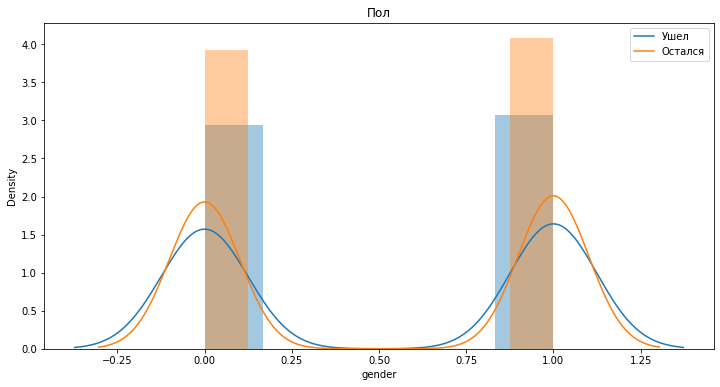

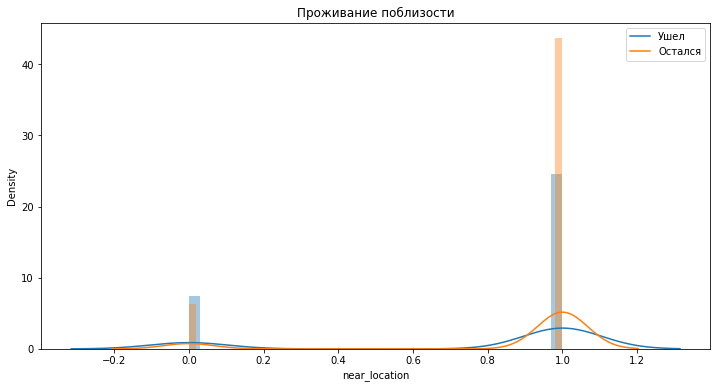

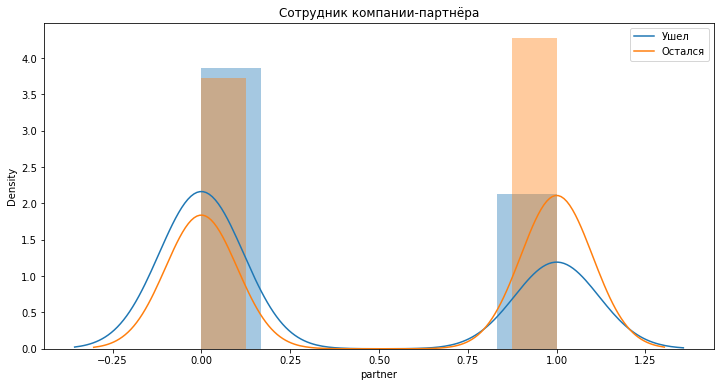

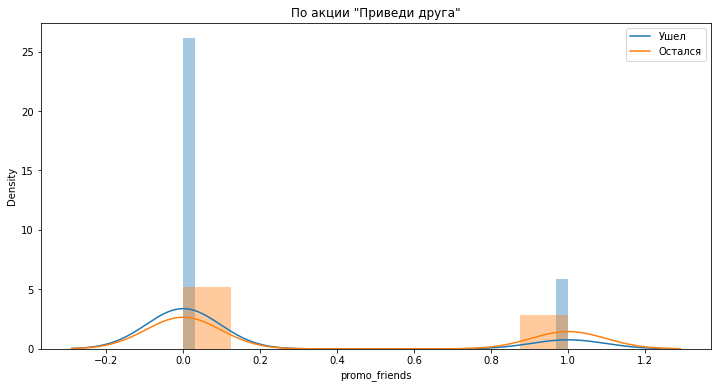

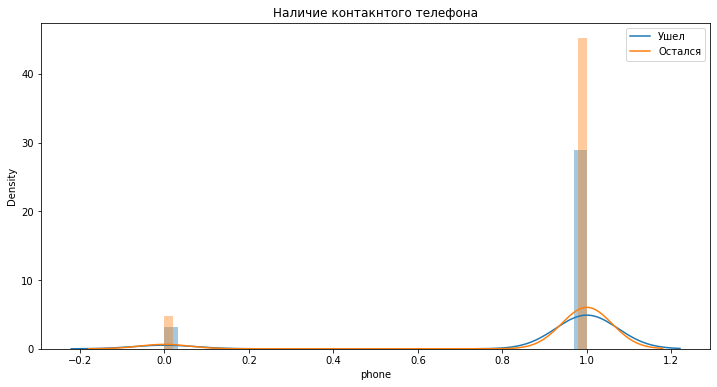

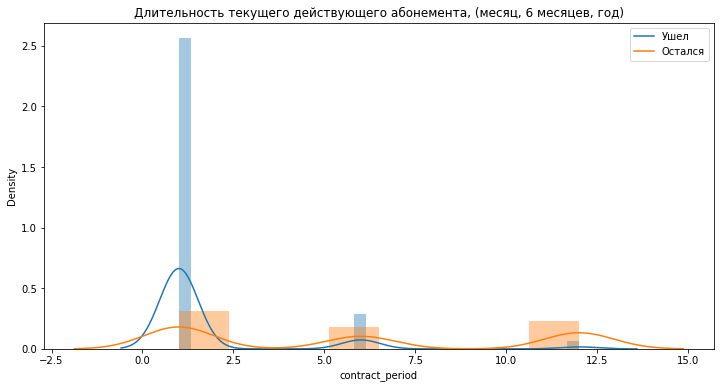

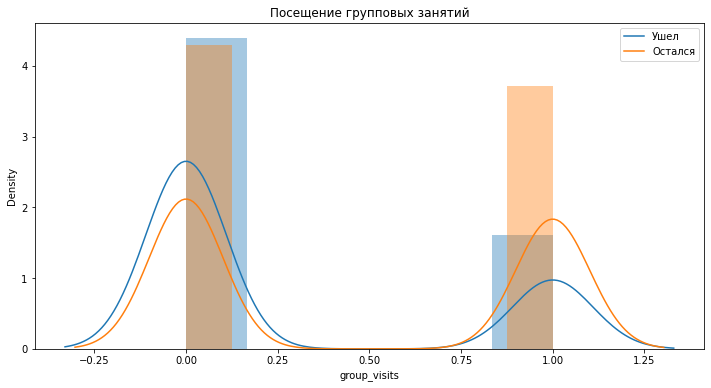

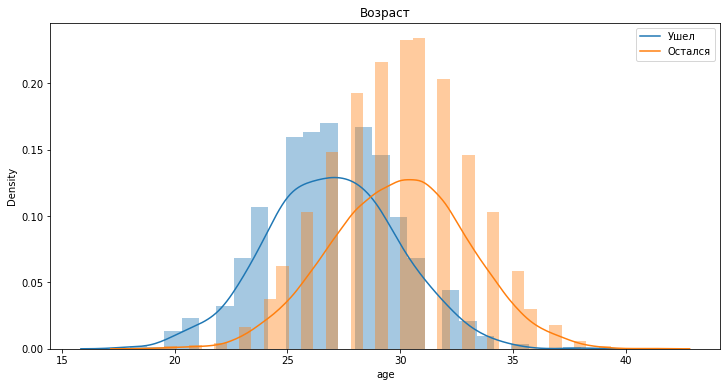

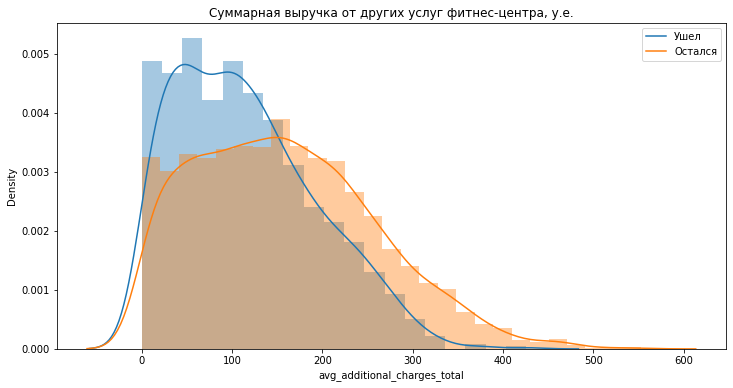

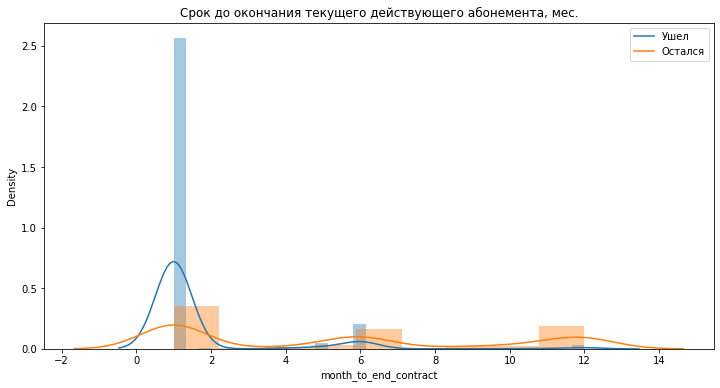

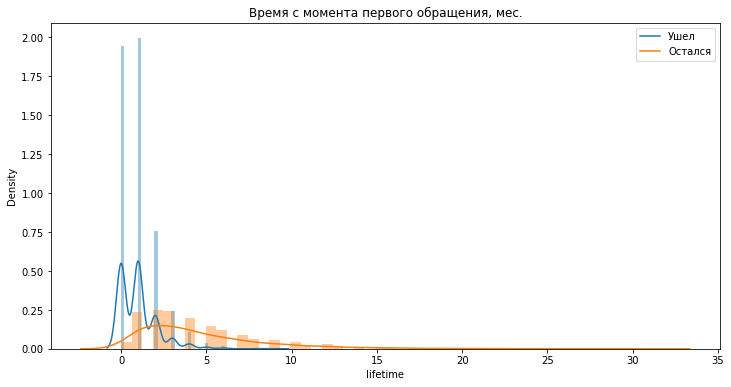

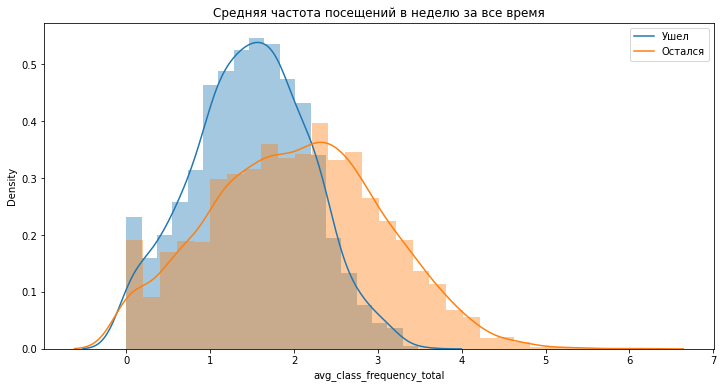

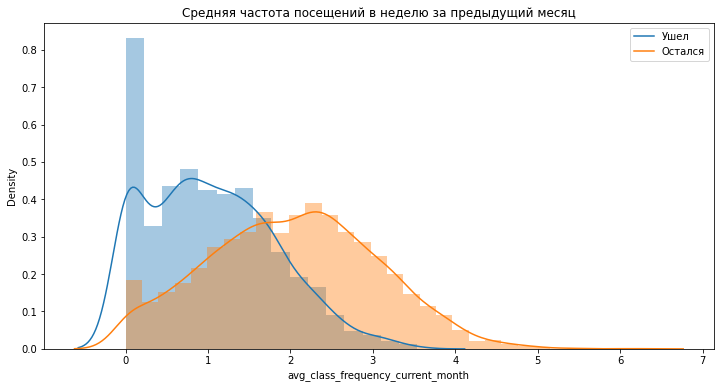

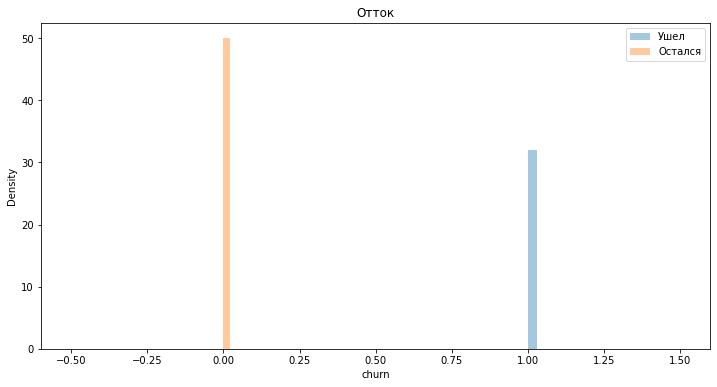

In [9]:
# сначала создадим список заголовков для диаграмм
titles_dict = ['Пол', 
               'Проживание поблизости', 
               'Сотрудник компании-партнёра', 
               'По акции "Приведи друга"', 
               'Наличие контакнтого телефона', 
               'Длительность текущего действующего абонемента, (месяц, 6 месяцев, год)',
               'Посещение групповых занятий',
               'Возраст', 
               'Суммарная выручка от других услуг фитнес-центра, у.е.',
               'Срок до окончания текущего действующего абонемента, мес.',
               'Время с момента первого обращения, мес.',
               'Средняя частота посещений в неделю за все время',
               'Средняя частота посещений в неделю за предыдущий месяц',
               'Отток'
               ]

# с помощью цикла построим диаграммы для всех столбцов датафрейма, разделив пользователей на оставшихся и ушедших
# добавим легенду и подпишем каждый график относительно ранее созданного списка titles_dict
count = 0
for column in df: 
  plt.figure(figsize=(12,6)) 
  plt.title(column)
  sns.distplot(df[df['churn'] == 1][column])
  sns.distplot(df[df['churn'] == 0][column])
  plt.legend(['Ушел', 'Остался'])
  plt.title(titles_dict[count])
  count+=1
  plt.show()

**Вывод**

* очень похоже выглядит распределение клиентов среди сотрудников компаний парнтеров и посещающих групповые занятие: такие реже уходят в отток. Возможно эти две группы связаны между собой - сотрудники одной компании вместе посещают групповые занятия.
* возраст клиентов распределен нормально, оставшиеся сдвинуты вправо (старше), ушедшие в свою очеред влево (младше).
* затраты на дополнительные услуги обеих групп сильно сдвинуты влево и, как мы увидели ранее, оставшиеся клиенты тратят больше.
* распределение по частоте посещений в неделю за все время и за последний месяц очень похожи - лояльные центру клиенты чаще его посещают.

### Матрица корреляции

Построим матрицу корреляций и отобразим её.

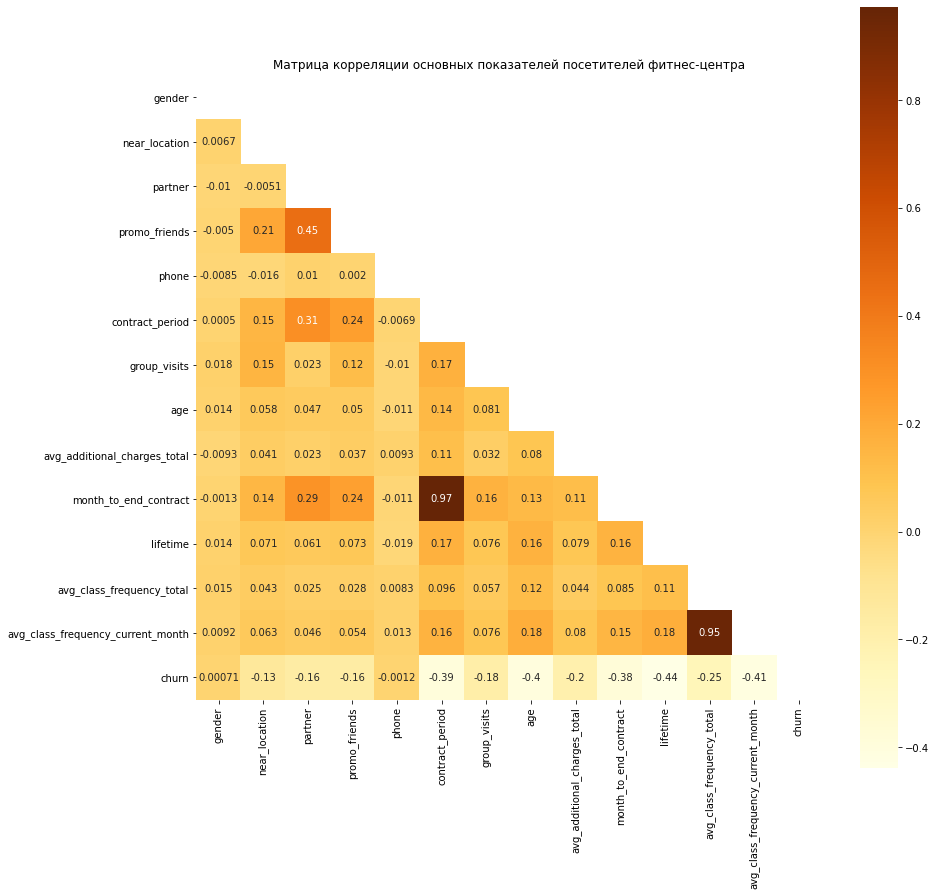

In [10]:
# построим матрицу корреляции, зададим размеры и цветовую гамму
# для удобства работы с матрицей уберем верхний треугольник с дублирующими данными корреляции
plt.figure(figsize=(14,14))
plt.title('Матрица корреляции основных показателей посетителей фитнес-центра')
matrix = np.triu(df.corr())
sns.heatmap(data = df.corr(), annot=True, square=True, cmap='YlOrBr', mask=matrix)
plt.show()

**Вывод**

На основании построенноё матрицы корреляции можно сказать следующее:
* пол и наличие контактного номера никак не связано с оттоком клиента;
* из представленных признаков наибольшую отрицательную корреляцию с оттоком имеют длительность текущего действующего абонемента, возраст, время с момента первого обращения в фитнес-центр (наибольшая корреляция), средняя частота посещений в неделю всего и за последний месяц;
* два признака мультиколлинеарны - `month_to_end_contract` и `avg_class_frequency_total`. Скорее всего это вызвано тем, что наблюдение за поведением клиентов ведется с первого дня работы фитнесс-центра или ввода абонементов. В дальнейшем, скорее всего, для корректного обучения модели необходимо будет их удалить.

### Вывод по исследовательскому анализу данных

Проведя исследовательский анализ, подготовились к обучению модели. На данном этапе выделили основные инсайты по признакам:
* отток клиентов составляет 26,5 %;
* разницы в оттоке по полу и контакнтому номеру нет, также эти признаки никак не влияют на отток;
* сотрудники компаний-партнеров и клиенты, посещающие групповые занятия, реже уходят;
* присутствует небольшая разница в среднем возрасте, более молодые чаще уходят в отток;
* частота посещений в неделю за все время и за последний месяц очень похожи - лояльные центру клиенты чаще его посещают.
* наибольшую отрицательную корреляцию с оттоком имеют длительность текущего действующего абонемента, возраст, время с момента первого обращения в фитнес-центр (наибольшая корреляция), средняя частота посещений в неделю всего и за последний месяц;
* два признака мультиколлинеарны - `month_to_end_contract` и `avg_class_frequency_total`.

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце: разобьем данные на обучающую и валидационную выборку функцией `train_test_split()`.

Обучии модель на train-выборке двумя способами:
* логистической регрессией,
* случайным лесом.

Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели и выберем лучшую.

Перед тем, как сравнивать модели необходимо избавиться от мультиколлинеарности путем регуляризации представленного датафрейма. Для этого из него удалим признаки `month_to_end_contract` и `avg_class_frequency_total`.

In [11]:
# удалим необходимые столбцы и перезапишем датафрейм
df = df.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1)

Проведем обучение модели двумя представленными способами и выведем основные полученные показатели:

Подготовим данные, разделив их на тренировочную и валидационную.

In [12]:
# разделим данные на признаки (матрица x) и целевую переменную (y)
x = df.drop('churn', axis = 1)
y = df['churn']

# разделим выборку на обучающую и валидационную в соотношении 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

Стандартизируем полученные выборки

In [13]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(x_train)

# преобразуем обучающий и валидационные наборы данных
x_train_st = scaler.transform(x_train)
x_test_st = scaler.transform(x_test)

Проведем обучение двух моделей и выведем основные метрики

In [14]:
# МОДЕЛЬ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

# зададим алгоритм для модели
lr_model = LogisticRegression(random_state=0)

# обучим модель
lr_model.fit(x_train_st, y_train)

# воспользуемся обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(x_test_st)

# выведем основные метрики обеих моделей для сравнения
print('Метрики для логистической регрессии')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))

# МОДЕЛЬ СЛУЧАЙНОГО ЛЕСА

# зададим алгоритм для модели
rf_model = RandomForestClassifier(random_state=0)

# оучим модель
rf_model.fit(x_train_st, y_train)

# воспользуемся обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(x_test_st)

# выведем основные метрики обеих моделей для сравнения
print('Метрики для случайного леса')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Метрики для логистической регрессии
Accuracy: 0.92
Precision: 0.85
Recall: 0.84
Метрики для случайного леса
Accuracy: 0.91
Precision: 0.85
Recall: 0.77


**Вывод**

Обе модели показали хорошие метрики, обучивишсь на тестовой выборке (80%) и применив ее к валидационной (20%). Несмотря на это, модель **логистической регрессии показала более высокие показатели основных метрик** accuracy, precision и recall.

## Кластеризация пользователей

### Иерархическая кластеризация и дендрограмма

Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика предположим количество возмонжных кластеров.

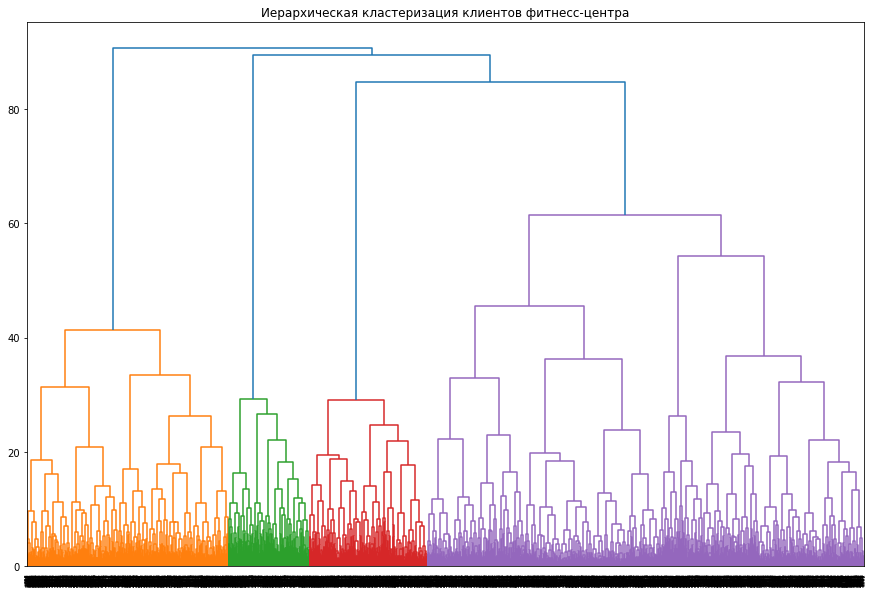

In [15]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
x_sc = sc.fit_transform(x)
linked = linkage(x_sc, method = 'ward')

# построим дендрограмму с заголовком
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов фитнесс-центра')
plt.show()

**Вывод**

На представленной дендрограмме видно, что **клиенты разделились на 4 кластера**.

### Алгоритм K-Means и прогноз кластеров.

Обучии модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Число кластеров принимаем n=5 согласно ТЗ проекта.
Исходя из средних значений признаков по кластерам постараемся охарактеризовать каждый и проанализировать оттоки.

In [16]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
df['clusters'] = labels

# выводим статистику по средним значениям признаков по кластеру
df.groupby(['clusters']).mean().T

clusters,0,1,2,3,4
gender,0.496447,0.500000,0.500940,0.534260,0.523316
near_location,0.995939,0.000000,1.000000,0.996028,0.862694
partner,0.892386,0.489247,0.217105,0.379345,0.471503
promo_friends,1.000000,0.078853,0.072368,0.009930,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,6.922843,2.994624,2.010338,6.208540,4.777202
group_visits,0.524873,0.232975,0.277256,0.538232,0.427461
age,29.606091,28.679211,27.583647,30.699106,29.297927
avg_additional_charges_total,153.424651,137.125763,119.339956,176.259567,144.208179
lifetime,4.283249,2.974910,1.922932,5.415094,3.940415


**Вывод**

Все 5 кластеров имеют примерно одинаковое распределение клиентов по полу, далее распишем особенности каждого по средним значениям:

**Кластер 1**
* все пользователи пришли по программе "приведи друга";
* имеет самую большую длительность текущего действующего абонемента 6.9 месяцев;
* половина пользователей посещают групповые занятия;
* **отток 11,9%**

**Кластер 2**
* все клиенты живут или работают далеко от фитнесс-центра;
* самая низкая доля клиентов, посещающих групповые занятия - 23,2%;
* **отток 40,3%**

**Кластер 3**
* самая маленькая длительность текущего действующего абонемента 2 месяца;
* самый минимальный возраст - 27,5 лет;
* самые низкие расходы на дополнительные услуги - 119 у.е.;
* время с момента первого обращения в фитнес-центр составляет всего 1.2 месяца;
* **максимальнный среди всех отток 56,4%.**

**Кластер 4**
* почти отсутствуют клиенты, привлеченные по программе "приведи друга";
* большая длительность текущего действующего абонемента - 6.2 месяца;
* самый возрастной кластер - 30,7 лет;
* больше всех тратят на дополнительные услуги - 176 у.е.;
* время с момента первого обращения в фитнес-центр 5.4 месяца;
* чаще других посещали занятия за прошлый месяц - 2.3 в неделю;
* **самый низкий отток - 0.01%.**

**Кластер 5**
* часть пользователей (14%) живет или работает далеко от фитнесс-центра;
* никто не указывал свой контактный номер телефона;
* **отток 26.6%.**

### Распределение признаков по кластерам

Построим гистограммы, чтобы взглянуть на распределения признаков по кластерам.

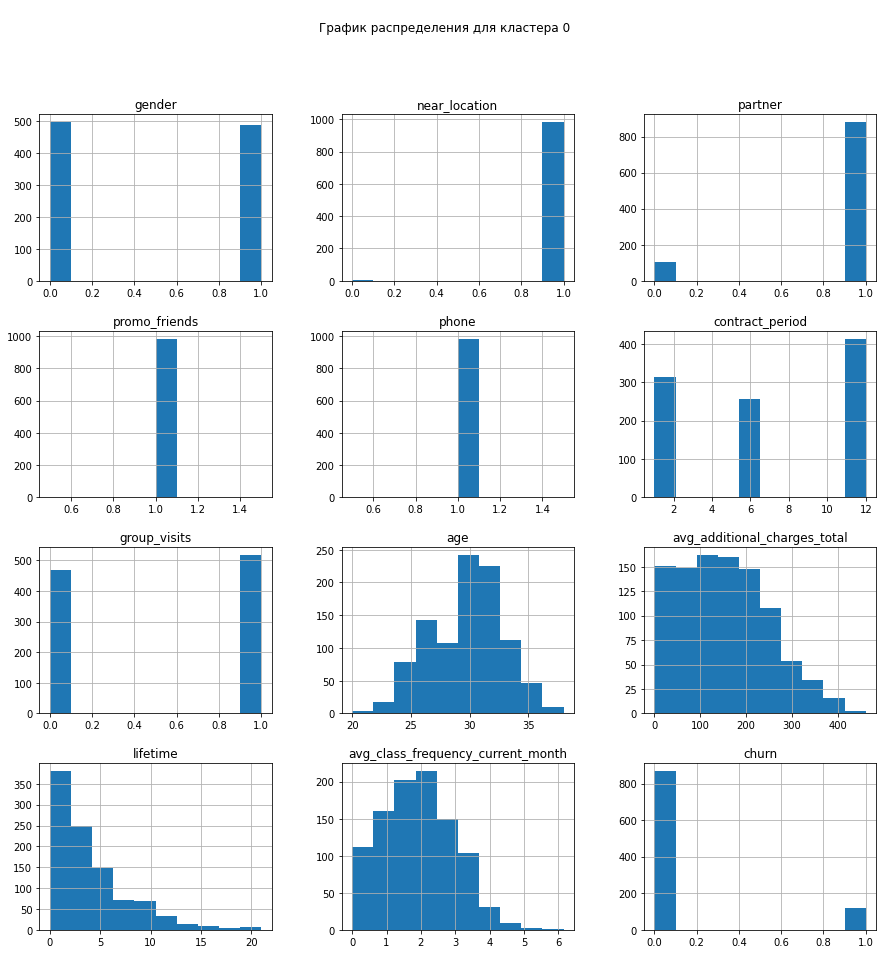

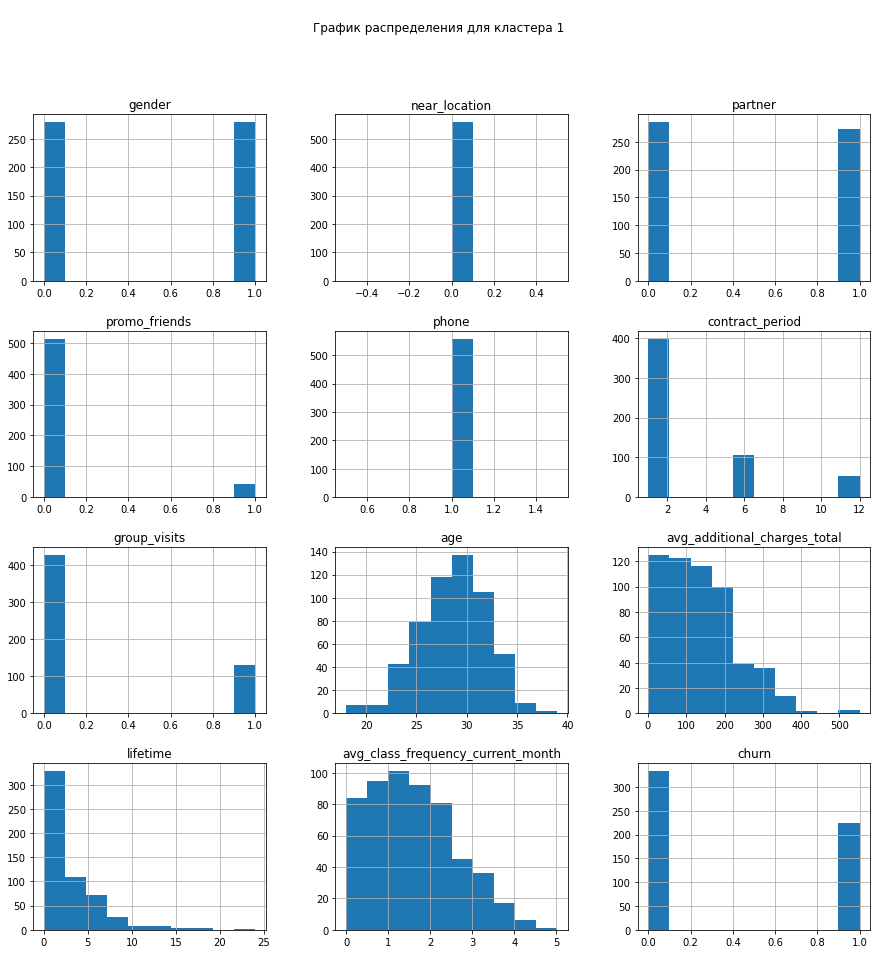

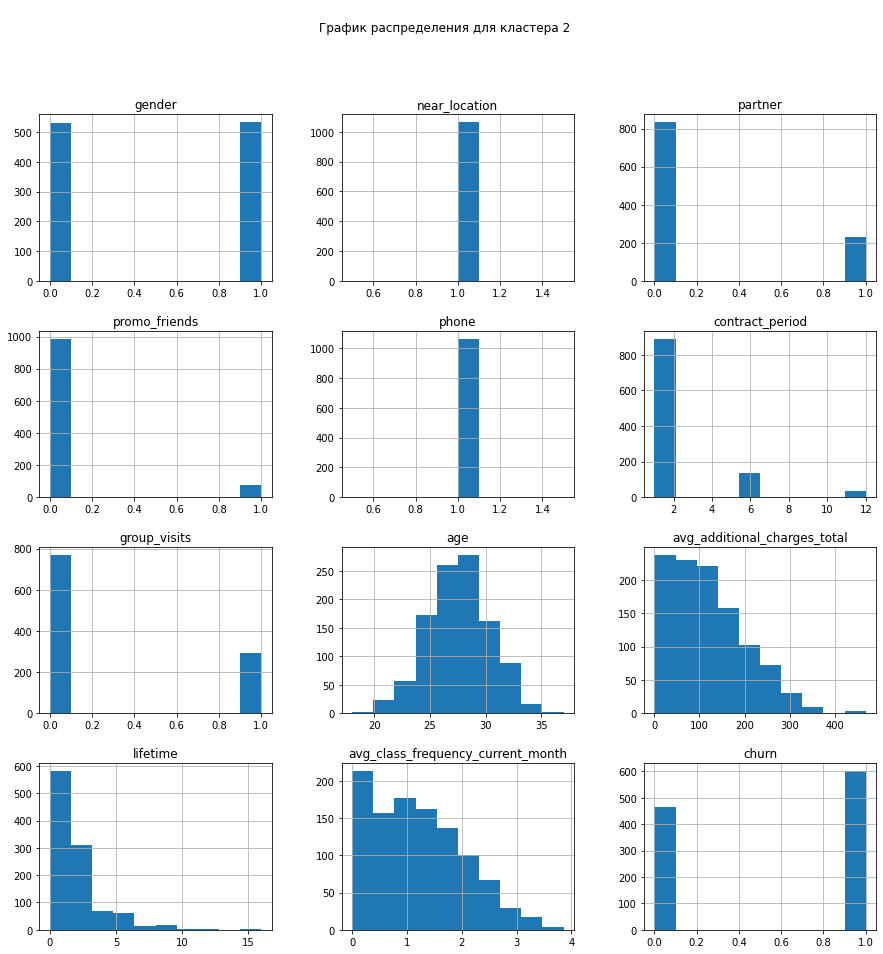

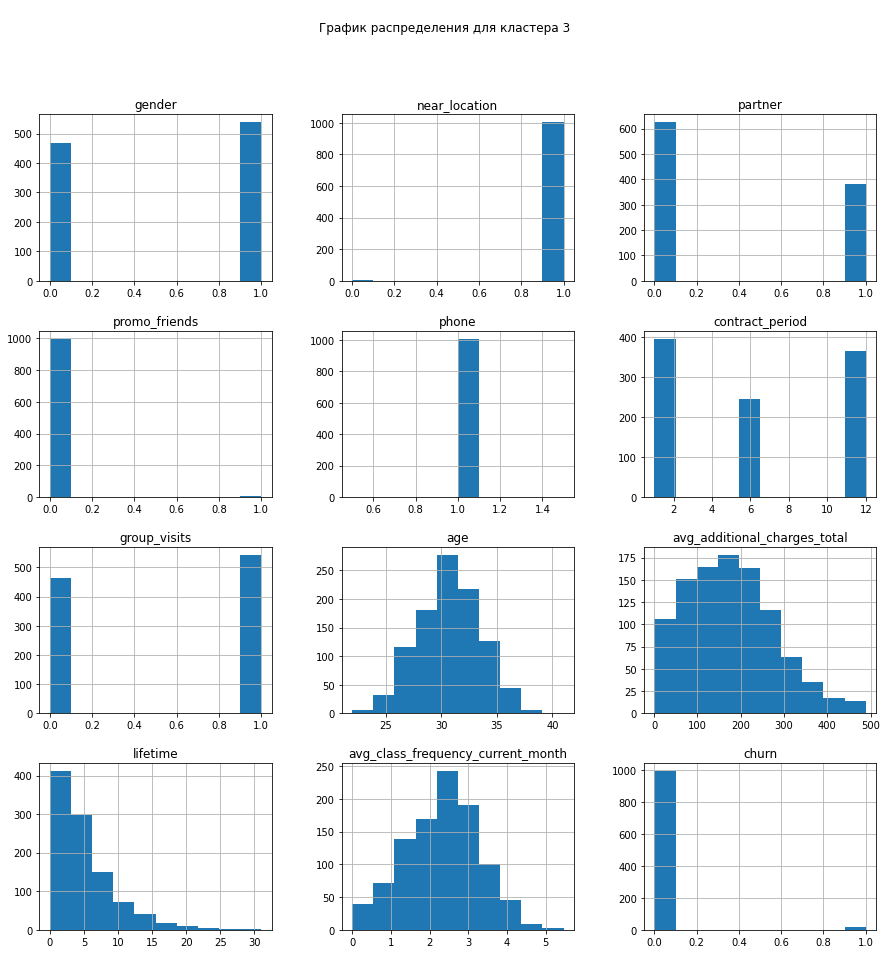

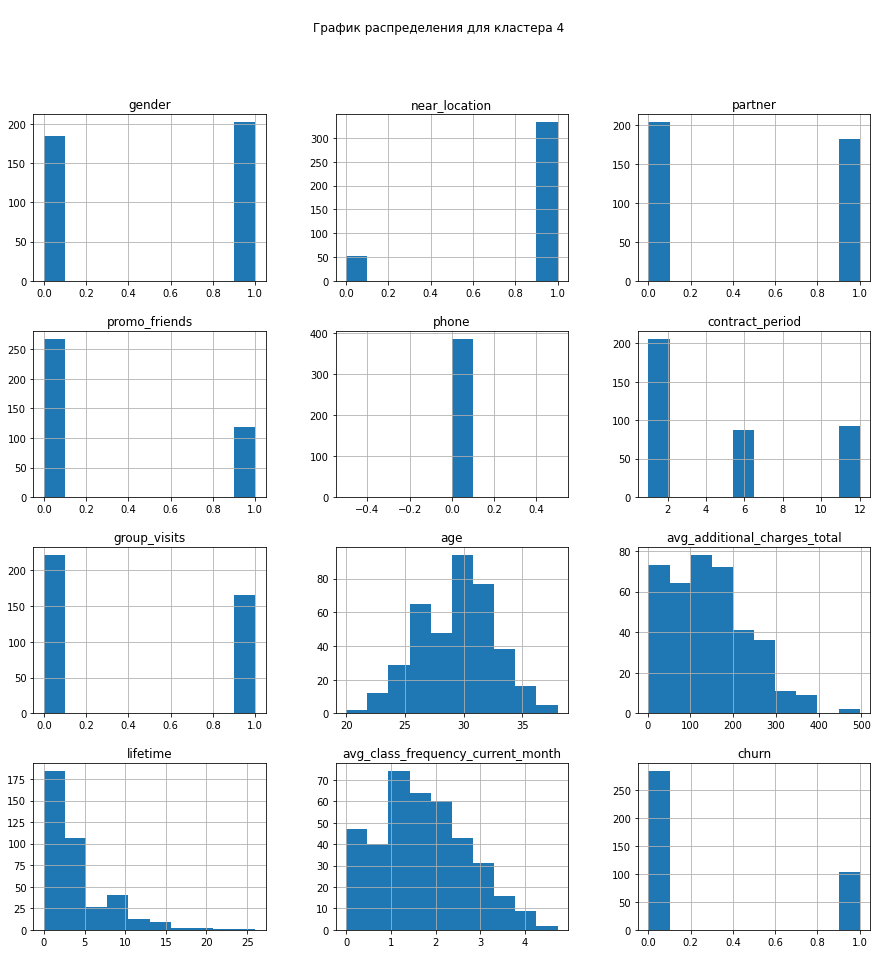

In [17]:
# уберем номер кластера из гистограм
df_hist = df.drop(['clusters'], axis=1)

# циклом построим гистограммы по всем признакамм для каждого кластера
for i in [0, 1, 2, 3, 4]:
  df_hist[df['clusters']==i].hist(figsize=(15,15))
  plt.suptitle('\nГрафик распределения для кластера {}'.format(i))
  plt.show()

**Вывод**

Распределение признаков по кластерам подтверждает выводы, полученные исходя из средних значений.

## Вывод и рекомендации

Выполнив данный проект провели исследовательский анализ представленного датафрейма. Построили столбчатые диаграммы и графики распределения признаков по оттоку клиентов. Получили основные выводы:

* отток клиентов составляет 26,5 %;
* разницы в оттоке по полу и контакнтому номеру нет, также эти признаки никак не влияют на отток;
* сотрудники компаний-партнеров и клиенты, посещающие групповые занятия, реже уходят;
* присутствует небольшая разница в среднем возрасте, более молодые чаще уходят в отток;
* частота посещений в неделю за все время и за последний месяц очень похожи - лояльные центру клиенты чаще его посещают.
* наибольшую отрицательную корреляцию с оттоком имеют длительность текущего действующего абонемента, возраст, время с момента первого обращения в фитнес-центр (наибольшая корреляция), средняя частота посещений в неделю всего и за последний месяц.

Далее обучили и сравнили модели машинного обучения. Соотношение обучающей и валидационной выборке взял 80:20. Обе модели показали себя хорошо, но победителем в данном случае оказалась модель линейной регрессии.

Провели иерархическую кластеризацию клиентов по признакам, построили дендрограмму и выделили 5 основных кластеров. Построили гистограммы признаков для каждого из них и изучили средние значения. Получилось охарактеризовать каждый из них:

**Кластер 1**
* все пользователи пришли по программе "приведи друга";
* имеет самую большую длительность текущего действующего абонемента 6.9 месяцев;
* половина пользователей посещают групповые занятия;
* **отток 11,9%**

**Кластер 2**
* все клиенты живут или работают далеко от фитнесс-центра;
* самая низкая доля клиентов, посещающих групповые занятия - 23,2%;
* **отток 40,3%**

**Кластер 3**
* самая маленькая длительность текущего действующего абонемента 2 месяца;
* самый минимальный возраст - 27,5 лет;
* самые низкие расходы на дополнительные услуги - 119 у.е.;
* время с момента первого обращения в фитнес-центр составляет всего 1.2 месяца;
* **максимальнный среди всех отток 56,4%.**

**Кластер 4**
* почти отсутствуют клиенты, привлеченные по программе "приведи друга";
* большая длительность текущего действующего абонемента - 6.2 месяца;
* самый возрастной кластер - 30,7 лет;
* больше всех тратят на дополнительные услуги - 176 у.е.;
* время с момента первого обращения в фитнес-центр 5.4 месяца;
* чаще других посещали занятия за прошлый месяц - 2.3 в неделю;
* **самый низкий отток - 0.01%.**

**Кластер 5**
* часть пользователей (14%) живет или работает далеко от фитнесс-центра;
* никто не указывал свой контактный номер телефона;
* **отток 26.6%.**

Собрав информацию по исследовательскому анализу и работе с кластерами можно выделить несколько основных рекомендаций:

* Низкий отток 4 кластера говорит о том, что программа "приведи друга" не способствует удержанию клиента. Возможно стоит распределить ресурсы этой программы на другие аспекты.
* Один из полученных инсайтов "больше посещений в неделю - меньше отток". Возможно, исходя из него, развить бонусную и скидочную программу для клиентов, которые стабильно посещают 2 занятия в неделю. Например по итогу месяца, если клиент ходил 2 раза в неделю - предполагается награда;
* У лояльных клиентов больше трат по дополнительным услугам фитнесс-центра. Возможно стоит сделать накопительную бонусную программу по этим услугам.
* Чем больше срок приобретенного абонемента, тем дисциплинированне клиент - ввести скидочную системы для покупки длительных абонементов;
* для удержангия клиентов с небольшим сроком абонемента - сделать скидочную системы для пролонгации.